<a href="https://colab.research.google.com/github/codernikita/cognitive-computing/blob/main/cc_ass10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
text=["The camera quality is amazing, and the battey life lasts long",
      "This phone has a great screen resolution and is very fast.",
      "The watch is sleek and stylish, but the battery life could be better."]

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x_bow=cv.fit_transform(text)
features=cv.get_feature_names_out()
print("bag of words vocabulary:")
print(features)
print("\n bag of words matrix:")
print(x_bow.toarray())


bag of words vocabulary:
['amazing' 'and' 'battery' 'battey' 'be' 'better' 'but' 'camera' 'could'
 'fast' 'great' 'has' 'is' 'lasts' 'life' 'long' 'phone' 'quality'
 'resolution' 'screen' 'sleek' 'stylish' 'the' 'this' 'very' 'watch']

 bag of words matrix:
[[1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 2 0 0 0]
 [0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0]
 [0 1 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 2 0 0 1]]


In [7]:
!pip install scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
x_tfidf=tfidf.fit_transform(text)
features=cv.get_feature_names_out()
print("tfidf matrix")
print(x_tfidf.toarray())

tfidf matrix
[[0.3229227  0.19072335 0.         0.3229227  0.         0.
  0.         0.3229227  0.         0.         0.         0.
  0.19072335 0.3229227  0.24559104 0.3229227  0.         0.3229227
  0.         0.         0.         0.         0.49118207 0.
  0.         0.        ]
 [0.         0.20026461 0.         0.         0.         0.
  0.         0.         0.         0.33907746 0.33907746 0.33907746
  0.20026461 0.         0.         0.         0.33907746 0.
  0.33907746 0.33907746 0.         0.         0.         0.33907746
  0.33907746 0.        ]
 [0.         0.17348826 0.29374116 0.         0.29374116 0.29374116
  0.29374116 0.         0.29374116 0.         0.         0.
  0.17348826 0.         0.22339772 0.         0.         0.
  0.         0.         0.29374116 0.29374116 0.44679544 0.
  0.         0.29374116]]


In [17]:
text1 = "Machine learning is a method of data analysis that automates analytical model building."
text2 = "Machine learning is used for data analysis and building predictive models automatically."


In [15]:
text1 = set(text1.split())
text2 = set(text2.split())
jaccard = len(text1 & text2) / len(text1 | text2)
print("Jaccard Similarity:", jaccard)

Jaccard Similarity: 0.25


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# TF-IDF vectorization
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([text1, text2])

# Compute cosine similarity
cos_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])
print(f"Cosine Similarity: {cos_sim[0][0]:.4f}")


Cosine Similarity: 0.3361


In [22]:
from textblob import TextBlob
review = "The story was super good and the really motivated everyone."
blob = TextBlob(review)
print("Polarity:", blob.sentiment.polarity)
print("Subjectivity:", blob.sentiment.subjectivity)

Polarity: 0.41111111111111104
Subjectivity: 0.4888888888888889


In [23]:
!pip install textblob wordcloud matplotlib


In [24]:
from textblob import TextBlob

reviews = [
    "The product quality is amazing and exceeded my expectations!",
    "It's okay, not too good and not too bad.",
    "Worst experience ever. Completely dissatisfied."
]


def classify_sentiment(polarity):
    if polarity > 0.1:
        return "Positive"
    elif polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"

classified_reviews = []

for review in reviews:
    blob = TextBlob(review)
    sentiment = classify_sentiment(blob.polarity)
    classified_reviews.append((review, sentiment))

for review, sentiment in classified_reviews:
    print(f"{sentiment}: {review}")


Positive: The product quality is amazing and exceeded my expectations!
Positive: It's okay, not too good and not too bad.
Negative: Worst experience ever. Completely dissatisfied.


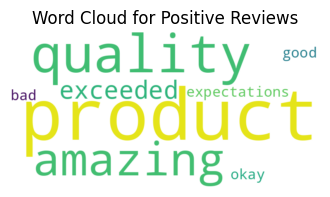

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all positive reviews
positive_text = " ".join([review for review, sentiment in classified_reviews if sentiment == "Positive"])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(4, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Positive Reviews")
plt.show()

In [29]:
!pip install keras tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer # Import Tokenizer from tensorflow.keras
from tensorflow.keras.utils import pad_sequences # Import pad_sequences from tensorflow.keras
text = "Machine learning is fun and exciting to learn"
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
sequences = []
words = text.split()
for i in range(1, len(words)):
    seq = words[:i+1]
    tokenized_seq = tokenizer.texts_to_sequences([' '.join(seq)])[0]
    sequences.append(tokenized_seq)
padded = pad_sequences(sequences)
print(padded)

[[0 0 0 0 0 0 1 2]
 [0 0 0 0 0 1 2 3]
 [0 0 0 0 1 2 3 4]
 [0 0 0 1 2 3 4 5]
 [0 0 1 2 3 4 5 6]
 [0 1 2 3 4 5 6 7]
 [1 2 3 4 5 6 7 8]]


In [30]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
model = Sequential()
model.add(Embedding(input_dim=50, output_dim=10, input_length=padded.shape[1]))
model.add(LSTM(50))
model.add(Dense(50, activation='relu'))
model.add(Dense(len(tokenizer.word_index)+1, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)